## Importing Libraries

In [5]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Crawl and Create Dataset

## Crawl Data from Website and Clean Data

In [6]:
# Website to get data: https://www.vietcombank.com.vn/vi-VN/KHCN/Cong-cu-Tien-ich/Ty-gia
# Identify endpoint where the data is fetched from: "endpoint":"/api/exchangerates?date="
res = requests.get("https://www.vietcombank.com.vn/api/exchangerates?date=2025-04-20") #choose the current date
raw_response = res.json()
raw_response

{'Count': 20,
 'Date': '2025-04-20T00:00:00',
 'UpdatedDate': '2025-04-20T23:00:00+07:00',
 'Data': [{'currencyName': 'US DOLLAR',
   'currencyCode': 'USD',
   'cash': '25730.00',
   'transfer': '25760.00',
   'sell': '26120.00',
   'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_usa.svg?h=32&w=32&ts=20230610195953&hash=4576D9B7C910424CC72B7A592BA369AE'},
  {'currencyName': 'EURO',
   'currencyCode': 'EUR',
   'cash': '28736.16',
   'transfer': '29026.42',
   'sell': '30310.80',
   'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_eur.svg?h=32&w=32&ts=20230610195955&hash=10502813C2316A5601FD57F7A0C89A3A'},
  {'currencyName': 'UK POUND STERLING',
   'currencyCode': 'GBP',
   'cash': '33541.10',
   'transfer': '33879.90',
   'sell': '34965.65',
   'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_gbp.svg?h=32&w=32&ts=20230610195950&hash=72ED63A02E20F8B413E65DE9B7F062AE'},
  {'currencyName': 'JAPANESE YEN',
   'currencyCode': 'JPY

In [7]:
raw_data = raw_response['Data']
raw_data

[{'currencyName': 'US DOLLAR',
  'currencyCode': 'USD',
  'cash': '25730.00',
  'transfer': '25760.00',
  'sell': '26120.00',
  'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_usa.svg?h=32&w=32&ts=20230610195953&hash=4576D9B7C910424CC72B7A592BA369AE'},
 {'currencyName': 'EURO',
  'currencyCode': 'EUR',
  'cash': '28736.16',
  'transfer': '29026.42',
  'sell': '30310.80',
  'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_eur.svg?h=32&w=32&ts=20230610195955&hash=10502813C2316A5601FD57F7A0C89A3A'},
 {'currencyName': 'UK POUND STERLING',
  'currencyCode': 'GBP',
  'cash': '33541.10',
  'transfer': '33879.90',
  'sell': '34965.65',
  'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_gbp.svg?h=32&w=32&ts=20230610195950&hash=72ED63A02E20F8B413E65DE9B7F062AE'},
 {'currencyName': 'JAPANESE YEN',
  'currencyCode': 'JPY',
  'cash': '175.83',
  'transfer': '177.61',
  'sell': '187.00',
  'icon': '/-/media/Default-Website/Default-Images/I

In [8]:
raw_df = pd.DataFrame(raw_data)
raw_df.info() # check for data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   currencyName  20 non-null     object
 1   currencyCode  20 non-null     object
 2   cash          20 non-null     object
 3   transfer      20 non-null     object
 4   sell          20 non-null     object
 5   icon          20 non-null     object
dtypes: object(6)
memory usage: 1.1+ KB


In [9]:
# Change data type, rename columns
raw_df[['cash', 'transfer', 'sell']] = raw_df[['cash', 'transfer', 'sell']].astype(float)
raw_df = raw_df.rename(columns={
    'currencyName': 'Currency Name',
    'currencyCode': 'Currency Code',
    'cash': 'Buying Rate (Cash)',
    'transfer': 'Buying Rate (Transfer)',
    'sell': 'Selling Rate'
})

exchange_df = raw_df
exchange_df

,Currency Name,Currency Code,Buying Rate (Cash),Buying Rate (Transfer),Selling Rate,icon
0,US DOLLAR,USD,25730.00,25760.00,26120.00,/-/media/Default-Website/Default-Images/Icons/...
1,EURO,EUR,28736.16,29026.42,30310.80,/-/media/Default-Website/Default-Images/Icons/...
2,UK POUND STERLING,GBP,33541.10,33879.90,34965.65,/-/media/Default-Website/Default-Images/Icons/...
3,JAPANESE YEN,JPY,175.83,177.61,187.00,/-/media/Default-Website/Default-Images/Icons/...
4,AUSTRALIAN DOLLAR,AUD,16103.27,16265.93,16787.20,/-/media/Default-Website/Default-Images/Icons/...
5,SINGAPORE DOLLAR,SGD,19253.46,19447.94,20111.38,/-/media/Default-Website/Default-Images/Icons/...
6,THAI BAHT,THB,684.13,760.15,792.40,/-/media/Default-Website/Default-Images/Icons/...
7,CANADIAN DOLLAR,CAD,18244.62,18428.91,19019.51,/-/media/Default-Website/Default-Images/Icons/...
8,SWISS FRANC,CHF,30872.61,31184.45,32183.82,/-/media/Default-Website/Default-Images/Icons/...
9,HONG KONG DOLLAR,HKD,3247.37,3280.17,3405.67,/-/media/Default-Website/Default-Images/Icons/...


## Create a Function to Auto-generate Exchange Rate

In [10]:
def gen_exchange_df(date: str) -> pd.DataFrame:
    """
    Function to fetch, transform, and clean exchange rate data for a given date.
    
    Args:
        date (str): The date in format 'YYYY-MM-DD' for which exchange rate data is retrieved.
        
    Returns:
        pd.DataFrame: A cleaned DataFrame containing exchange rate data with numerical columns for 'cash', 'transfer', and 'sell'.
    """
    # API call to fetch data
    res = requests.get(f"https://www.vietcombank.com.vn/api/exchangerates?date={date}")
    
    # Parse JSON response
    raw_response = res.json()
    raw_data = raw_response.get('Data', [])
    
    # Create DataFrame and clean data
    raw_df = pd.DataFrame(raw_data)
    raw_df['Date'] = date
    if not raw_df.empty:
        raw_df[['cash', 'transfer', 'sell']] = raw_df[['cash', 'transfer', 'sell']].astype(float)
    raw_df = raw_df.rename(columns={
    'currencyName': 'Currency Name',
    'currencyCode': 'Currency Code',
    'cash': 'Buying Rate (Cash)',
    'transfer': 'Buying Rate (Transfer)',
    'sell': 'Selling Rate'
    })
    raw_df['Date'] = date
    
    return raw_df

In [11]:
gen_exchange_df('2025-04-01')

,Currency Name,Currency Code,Buying Rate (Cash),Buying Rate (Transfer),Selling Rate,icon,Date
0,US DOLLAR,USD,25430.00,25460.00,25820.00,/-/media/Default-Website/Default-Images/Icons/...,2025-04-01
1,EURO,EUR,27034.48,27307.55,28516.39,/-/media/Default-Website/Default-Images/Icons/...,2025-04-01
2,UK POUND STERLING,GBP,32315.95,32642.38,33689.08,/-/media/Default-Website/Default-Images/Icons/...,2025-04-01
3,JAPANESE YEN,JPY,165.34,167.01,175.85,/-/media/Default-Website/Default-Images/Icons/...,2025-04-01
4,AUSTRALIAN DOLLAR,AUD,15637.07,15795.02,16301.50,/-/media/Default-Website/Default-Images/Icons/...,2025-04-01
5,SINGAPORE DOLLAR,SGD,18610.68,18798.67,19440.31,/-/media/Default-Website/Default-Images/Icons/...,2025-04-01
6,THAI BAHT,THB,663.12,736.80,768.07,/-/media/Default-Website/Default-Images/Icons/...,2025-04-01
7,CANADIAN DOLLAR,CAD,17389.68,17565.33,18128.57,/-/media/Default-Website/Default-Images/Icons/...,2025-04-01
8,SWISS FRANC,CHF,28341.80,28628.08,29546.06,/-/media/Default-Website/Default-Images/Icons/...,2025-04-01
9,HONG KONG DOLLAR,HKD,3202.03,3234.37,3358.18,/-/media/Default-Website/Default-Images/Icons/...,2025-04-01


## Fetch Exchange Rate Data for a Time Range and Save to a File

In [12]:
from datetime import date, timedelta
start_date = date(2025, 1, 1)
end_date = date(2025, 4, 21)
delta = (end_date - start_date).days

In [13]:
lst_df = []

for i in range(delta):
    curr_date = start_date + timedelta(days=i)
    df = gen_exchange_df(curr_date)
    lst_df.append(df)

all_data = pd.concat(lst_df, ignore_index=True)
all_data.to_csv("Curr_exchange_rate.csv", index=False)

# Analyzing Currency Exchange Rate Dataset

## Current Exchange Rate Analysis and Outlier Detection

C:\Users\Ngoc Mai\AppData\Local\Temp\ipykernel_8236\1733233781.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


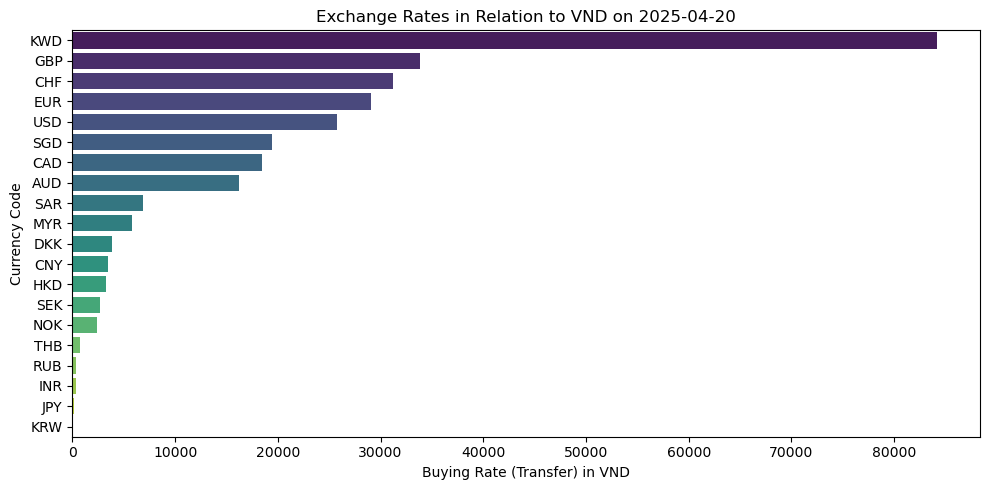

In [14]:
# Focus on the lastest date of the dataset
all_data["Date"] = pd.to_datetime(all_data["Date"])
latest_date = all_data["Date"].max()
df_latest = all_data[all_data["Date"] == latest_date].copy()

# Sort by Buying Rate (Transfer) for ranking
df_latest_sorted = df_latest.sort_values(by="Buying Rate (Transfer)", ascending=False)

# Plotting: Top 20 exchange rates
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_latest_sorted,
    y="Currency Code",
    x="Buying Rate (Transfer)",
    palette="viridis"
)
plt.title(f"Exchange Rates in Relation to VND on {latest_date.date()}")
plt.xlabel("Buying Rate (Transfer) in VND")
plt.ylabel("Currency Code")
plt.tight_layout()
plt.show()

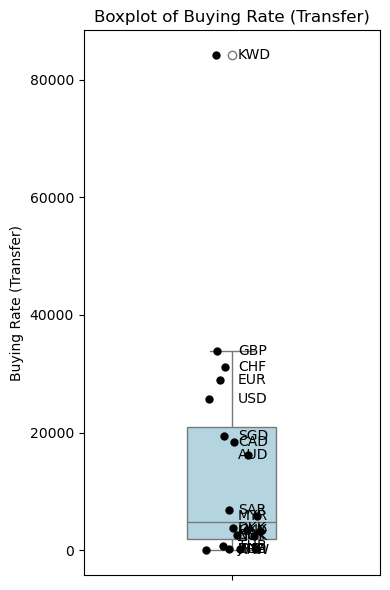

In [27]:
# Boxplot for Outlier Detection
plt.figure(figsize=(4, 6))
sns.boxplot(
    y=df["Buying Rate (Transfer)"], 
    color="lightblue", 
    width=0.3)

# Add Stripplot for further clarification
sns.stripplot(
    y=df["Buying Rate (Transfer)"], 
    color="black", 
    size=6, 
    jitter=True)

for i, rate in enumerate(df["Buying Rate (Transfer)"]):
    plt.text(
        x=0.02,  # Horizontal positioning (adjust as needed)
        y=rate,  # Vertical positioning
        s=df["Currency Code"].iloc[i],  # Currency code label
        fontsize=10,
        va='center'  # Vertical alignment)
    )

plt.title('Boxplot of Buying Rate (Transfer)')
plt.ylabel('Buying Rate (Transfer)')
plt.tight_layout()
plt.show()

In [16]:
# Get top and bottom currency
highest = df_latest_sorted.iloc[0][["Currency Name", "Buying Rate (Transfer)"]]
lowest = df_latest_sorted.iloc[-1][["Currency Name", "Buying Rate (Transfer)"]]

highest, lowest

(Currency Name             KUWAITI DINAR
 Buying Rate (Transfer)         84146.97
 Name: 2194, dtype: object,
 Currency Name             KOREAN WON
 Buying Rate (Transfer)         17.51
 Name: 2193, dtype: object)

The analysis of currency exchange rates has shown some interesting trends:
- Among all currencies, the Kuwaiti Dinar (KWD) stands out with the highest buying rate, far ahead of the rest. As a oil-backed economy, Kuwwait maintains strong currency values and emerging markets like Vietnam often trade at lower levels. Other powerful currencies such as the British Pound (GBP), Swiss Franc (CHF), Euro (EUR), and US Dollar (USD) also show high buying rates, showwing their important roles in global trade and finance.
- Meanwhile, regional currencies like the Singapore Dollar (SGD), Chinese Yuan (CNY), Thai Baht (THB), and Malaysian Ringgit (MYR) sit at mid-level rates, suggesting moderate currency strength compared to Vietnam Dong (VND). In contrast, currencies like the South Korean Won (KRW), Japanese Yen (JPY), and Russian Ruble (RUB) are closer to the lower end of the scale, even though they still play important roles in trade, tourism, and investments.

Looking at the boxplot:
- The KWD appears as a clear outlier, far above the main group of currencies. Other strong currencies such as the GBP, CHF, EUR, and USD form a smaller high-value cluster, while regional currencies show more stable, less variable buying rates.

## Currency Votality and Appreciation/Depreciation Trends

C:\Users\Ngoc Mai\AppData\Local\Temp\ipykernel_28596\4078176546.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.head(10).values, y=volatility.head(10).index, palette="viridis")


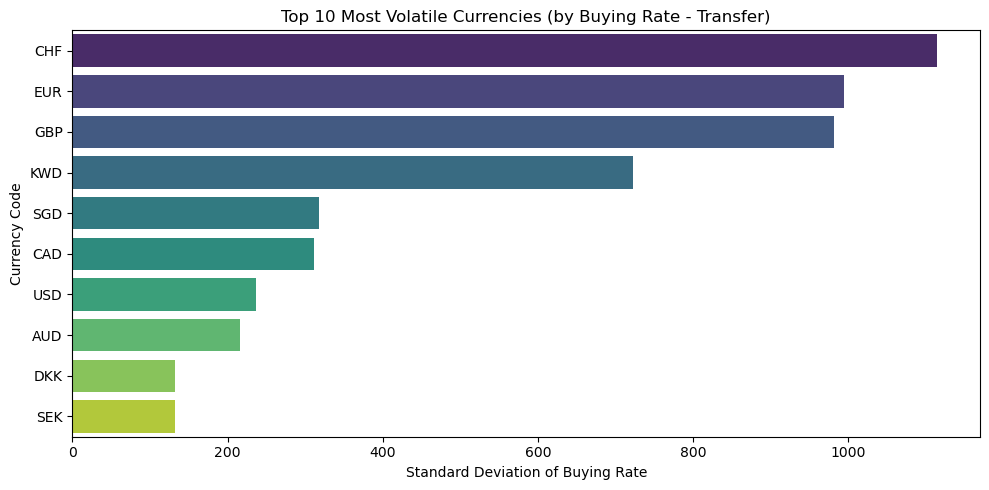

In [13]:
# Group by currency and calculate standard deviations
volatility = all_data.groupby('Currency Code')["Buying Rate (Transfer)"].std().sort_values(ascending=False)

# List out the top 10 most volatile currencies
plt.figure(figsize=(10,5))
sns.barplot(x=volatility.head(10).values, y=volatility.head(10).index, palette="viridis")
plt.title("Top 10 Most Volatile Currencies (by Buying Rate - Transfer)")
plt.xlabel("Standard Deviation of Buying Rate")
plt.ylabel("Currency Code")
plt.tight_layout()
plt.show()

C:\Users\Ngoc Mai\AppData\Local\Temp\ipykernel_28596\2275093880.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct_change.head(10).values, y=pct_change.head(10).index, palette="crest")


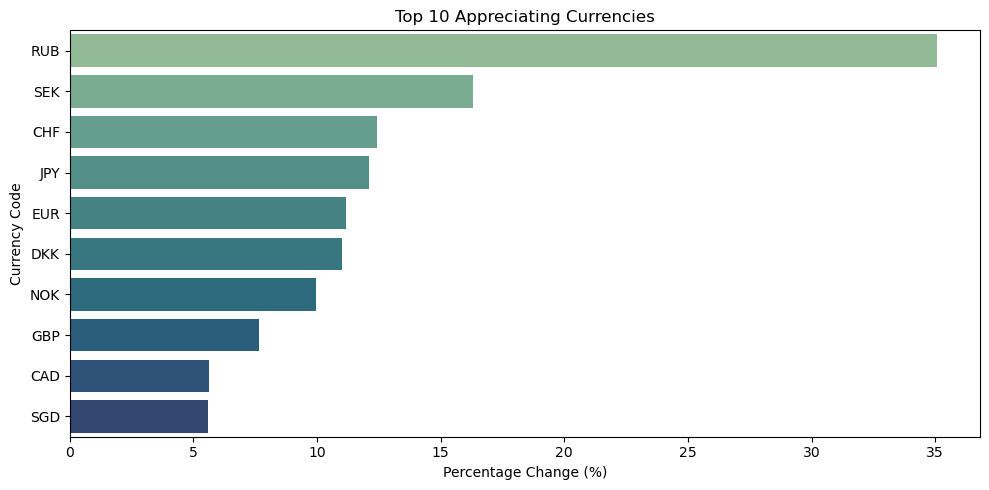

C:\Users\Ngoc Mai\AppData\Local\Temp\ipykernel_28596\2275093880.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct_change.tail(10).values, y=pct_change.tail(10).index, palette="rocket")


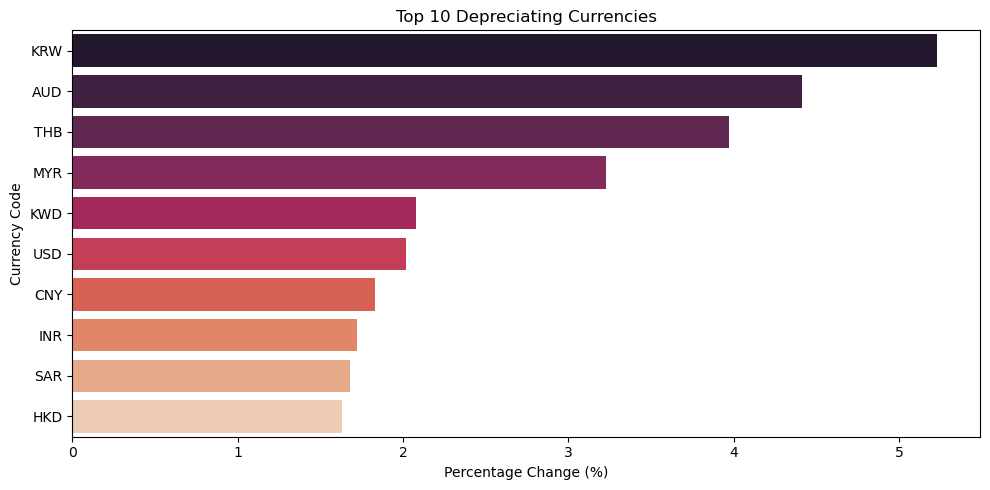

In [14]:
# Find first and last exchange rate for each currency
first_rates = all_data.sort_values('Date').groupby('Currency Code').first()
last_rates = all_data.sort_values('Date').groupby('Currency Code').last()

# Calculate percentage change
pct_change = ((last_rates["Buying Rate (Transfer)"] - first_rates["Buying Rate (Transfer)"]) / first_rates["Buying Rate (Transfer)"]) * 100
pct_change = pct_change.sort_values(ascending=False)

# Top 10 appreciating currencies
plt.figure(figsize=(10,5))
sns.barplot(x=pct_change.head(10).values, y=pct_change.head(10).index, palette="crest")
plt.title("Top 10 Appreciating Currencies")
plt.xlabel("Percentage Change (%)")
plt.ylabel("Currency Code")
plt.tight_layout()
plt.show()

# Top 10 deppreciating currencies
plt.figure(figsize=(10,5))
sns.barplot(x=pct_change.tail(10).values, y=pct_change.tail(10).index, palette="rocket")
plt.title("Top 10 Depreciating Currencies")
plt.xlabel("Percentage Change (%)")
plt.ylabel("Currency Code")
plt.tight_layout()
plt.show()

When it comes to currency volatility:
- The Swiss Franc (CHF), Euro (EUR), and British Pound (GBP) are among the most volatile as they are more vulnerable to changes in global economic conditions. Although the KWD is very strong, it also shows some instability, mostly because of oil price movements and geopolitical risks.
- On the other hand, regional currencies like the Thai Baht (THB) and Chinese Yuan (CNY) are relatively stable, which reflects strong and steady economic ties with Vietnam.

In terms of appreciation and depreciation trends:
- The Russian Ruble (RUB) shows the strongest appreciation, thanks to improved trade balances or a recovering economy. The Swedish Krona (SEK), Japanese Yen (JPY), and Swiss Franc (CHF) also show signs of strengthening.
- Meanwhile, the South Korean Won (KRW) and Australian Dollar (AUD) have weakened noticeably, likely due to slower growth or external pressures. Other regional currencies like the THB, MYR, and CNY are depreciating too, but at a slower and more stable pace.

## Future Value Forecasting

In [16]:
import statsmodels.api as sm
import pmdarima as pm

Processing USD...
Processing EUR...
Processing JPY...
Processing GBP...
Processing AUD...


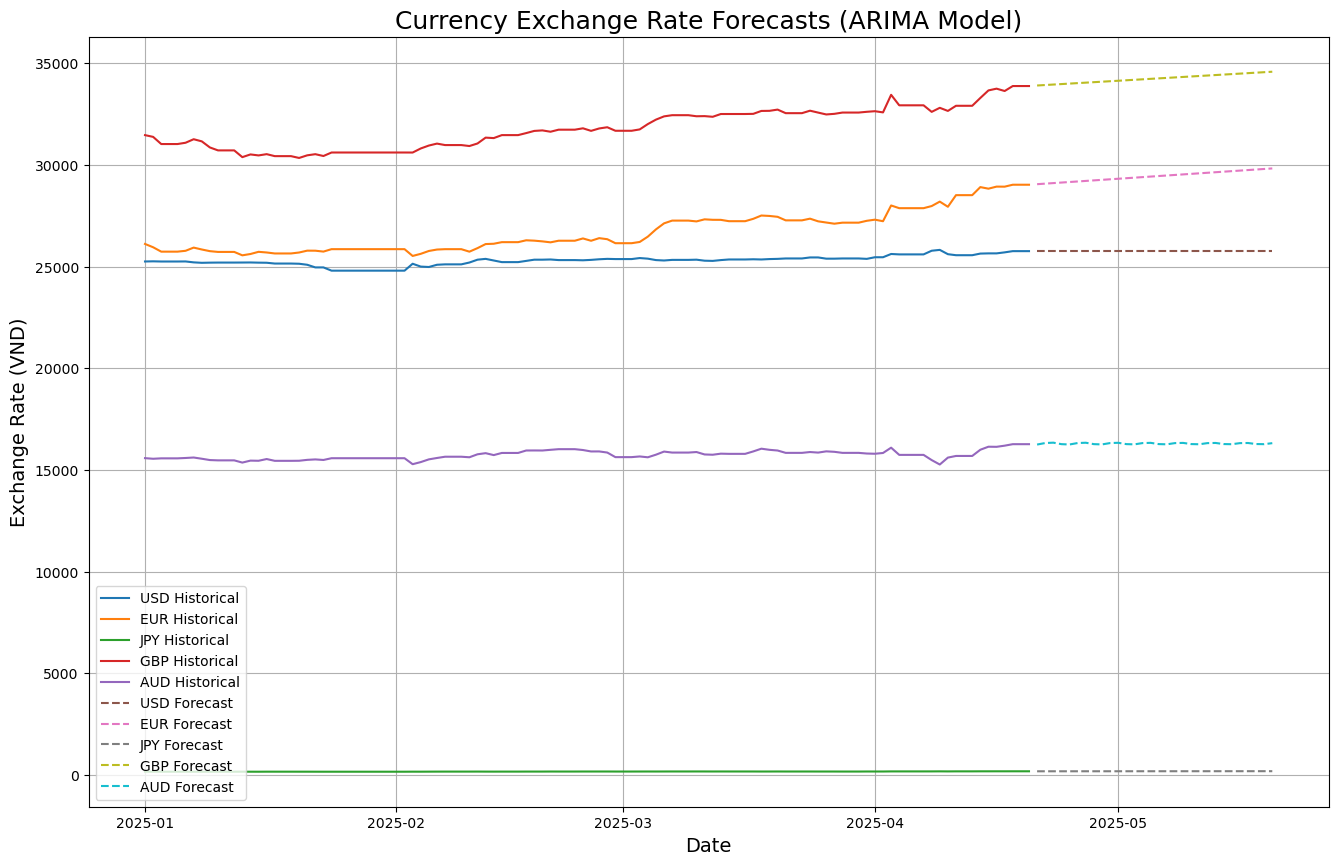

In [17]:
# Choose 5 most common currencies to forecast
currencies_to_forecast = ["USD", "EUR", "JPY", "GBP", "AUD"]

# Forecast settings
n_periods = 30  
forecast_data = {}

# Loop through each currency
for currency in currencies_to_forecast:
    print(f"Processing {currency}...")

    # Filter data for this currency
    df_currency = all_data[all_data["Currency Code"] == currency].sort_values("Date")
    df_currency = df_currency.set_index("Date")["Buying Rate (Transfer)"]

    # Employ AUTO ARIMA for automatic tuning of p,d,q parameters
    model = pm.auto_arima(df_currency, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)

    # Forecast future
    forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

    # Create future dates
    forecast_index = pd.date_range(df_currency.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='D')

    # Store results
    forecast_data[currency] = {
        "historical": df_currency,
        "forecast": pd.Series(forecast, index=forecast_index),
        "conf_int": conf_int
    }

# 🎨 Combined Plot
plt.figure(figsize=(16,10))

# Plot historical data
for currency, data in forecast_data.items():
    plt.plot(data["historical"].index, data["historical"], label=f"{currency} Historical", linestyle='-')

# Plot forecast data
for currency, data in forecast_data.items():
    plt.plot(data["forecast"].index, data["forecast"], label=f"{currency} Forecast", linestyle='--')

plt.title('Currency Exchange Rate Forecasts (ARIMA Model)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Exchange Rate (VND)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

The forecasts show a mostly stable picture for the key global currencies within the next 30 days:
- The US Dollar (USD) is expected to stay strong with slight upward movements, reflecting the steady demand for the currency.
- The Euro (EUR) and British Pound (GBP) also show similar patterns — generally stable, with minor increases.
- The Australian Dollar (AUD) is expected to remain quite steady, without major changes.
- Among all, the Japanese Yen (JPY) stands out with exceptional stability, showing almost no fluctuation historically and looking likely to continue that way over the next month. This makes the Yen an attractive choice for those who prefer safer, less risky currencies.

Overall, in today’s global environment where trade policies and tariffs — like those introduced during Trump’s administration — still influence currency movements, strong economies continue to show resilience. Meanwhile, regional players maintain stability despite the ongoing challenges.